In [8]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid
import torch

In [10]:
# use from_pipe to avoid consuming additional memory when loading a checkpoint
pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("mps")
pipeline = AutoPipelineForImage2Image.from_pipe(pipeline_text2image).to("mps")

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]


100%|██████████| 40/40 [36:40<00:00, 55.01s/it]


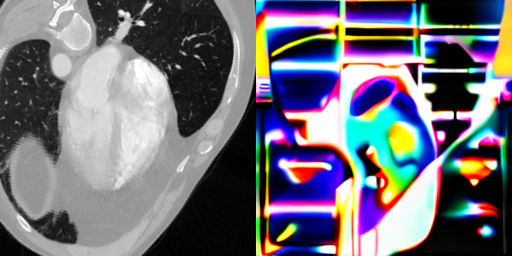

In [18]:
init_image = load_image("/Users/emiz/Desktop/img3d_CT_bav75_A4CH.png")
init_image = init_image.resize((256, 256))
pipeline.enable_attention_slicing()
prompt = "an echocardiography ultrasound image of the same anatomy as the CT scan"
image = pipeline(prompt, image=init_image, strength=0.8, guidance_scale=10.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

100%|██████████| 40/40 [51:19<00:00, 76.98s/it]   


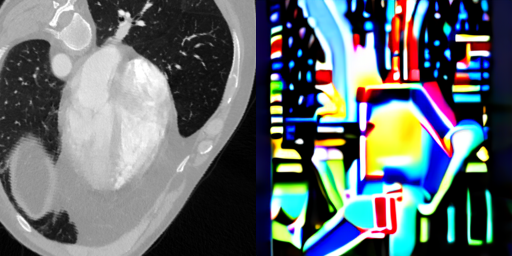

In [20]:
init_image = load_image("/Users/emiz/Desktop/img3d_CT_bav75_A4CH.png")
init_image = init_image.resize((256, 256))
pipeline.enable_attention_slicing()
prompt = "turn this CT scan into a transesophageal echocardiography image of the same heart anatomy"
image = pipeline(prompt, image=init_image, strength=0.8, guidance_scale=10.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

In [19]:
image.show()